In [1]:
#Assignment of Advanced statistics project

#Par Inc., is a major manufacturer of golf equipment. Management believes that Par’s market share could be increased with the
#introduction of a cut resistant, longer resistant, longer lasting golf ball

#1. Formulate and present the rationale for hypotheses test that Par could use to compare the driving distance of current and 
# new Golf balls
# 2. Analyze the data to provide hypotheses testing conclusion, what is the p-value for the test and recommendation

# 3. Provide descriptive statistics summary of data


In [111]:
#Importing key packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro, wilcoxon,iqr
from statsmodels.stats.power import ttest_power
%matplotlib inline

In [7]:
par = pd.read_excel('SM4-Golf.xls')

In [8]:
par.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


In [10]:
#testing data class; both variables are numeric
par.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
Current    40 non-null int64
New        40 non-null int64
dtypes: int64(2)
memory usage: 720.0 bytes


In [11]:
#Understanding shape & size of the data
print(par.shape)
print (par.size)

(40, 2)
80


In [12]:
#Creating a duplicate dataset for analysis
par1=par

In [13]:
#Testing for missing values
# there is no missing values; hence good to proceed for descritive analysis
par1.isnull().values.any()

False

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023C4F746208>]],
      dtype=object)

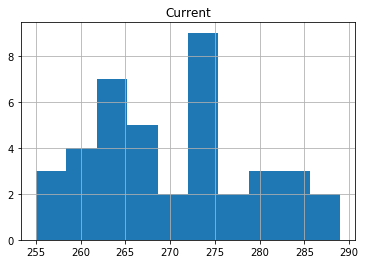

In [16]:
par1.hist("Current")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023C4F72B5F8>]],
      dtype=object)

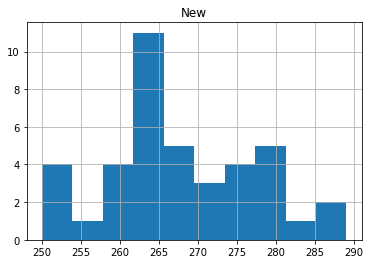

In [17]:
par1.hist("New")

In [19]:
#Checking 5 point summary for Par1 dataset
par1.describe()

#Key conclusion
# 1. Mean & Median lie at the same point, which suggest data to be normally distributed
# 2. Average distance covered by current ball is higher than new ball
# 3. Low variation in Current ball sample than new balls suggest more reliability in performance
# All the points mentioned above must be tested statistically for further reliability

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


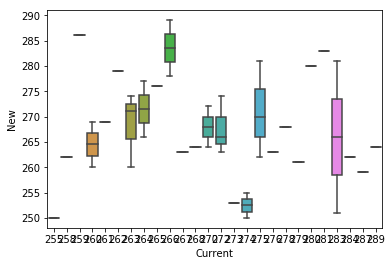

In [51]:
#Testing for Outliers in data through boxplot
sns.boxplot(x='Current', y='New', data=par1)

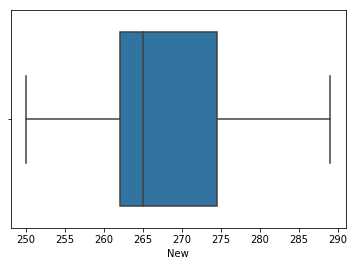

In [26]:
sns.boxplot(par1['New'])

In [27]:
#Testing for normality
#H0: The sample is normally distributed
#Ha: Sample is non-normal
#As p-value is more than 0.03, we fail to reject H0 and conclude that the sample is normal
stat, p = shapiro(par1['Current'])
print(stat,p)

0.9707046747207642 0.378787100315094


In [28]:
#As p-value is more than 0.03, we fail to reject H0 and conclude that the sample is normal
stat, p = shapiro(par1['New'])
print(stat,p)

0.9678263664245605 0.3064655363559723


In [29]:
#plotting quotient to Quotient to check the distribution
from statsmodels.graphics.gofplots import qqplot


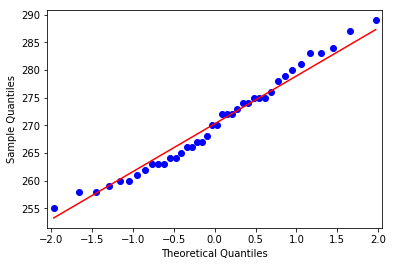

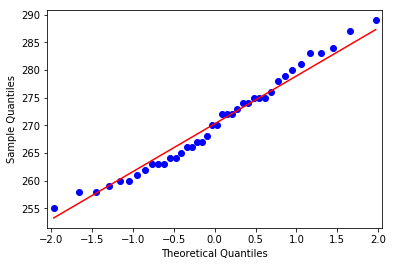

In [32]:
qqplot(par1['Current'],line='s')
#qqplot shows that the data is close the normality and no point as outlier

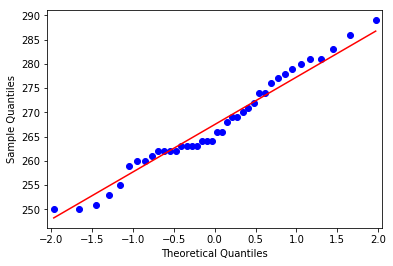

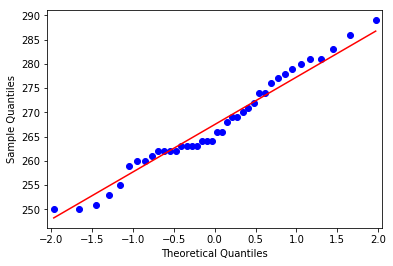

In [33]:
qqplot(par1['New'],line='s')
#qqplot shows that the data is close the normality and no point as outlier

In [34]:
#As the data is normal, two smaple "Current" & "New" are independent, we can apply 2 sample t-test for hypothesis testing
#Breaking the 2 samples in 2 different groups
grp_new = par1.drop('Current',axis = 1)

In [35]:
grp_new.head()

,New
0,277
1,269
2,263
3,266
4,262


In [36]:
grp_Current = par1.drop('New',axis = 1)

In [38]:
grp_Current.head()

,Current
0,264
1,261
2,267
3,272
4,258


In [42]:
x_bar_current = np.mean(grp_Current)
x_bar_New = np.mean(grp_new)

In [ ]:
#Hyothesizing the problem statement
# H0: x-bar_current-x-bar_new = 0
# Ha: x-bar_current-x-bar_new != 0
#Confidence Interval = 95% 
# alpha = 

In [41]:
#Applying 2 Sample t test on the 2 data sets 
t_statistic,p_value =  ttest_ind(grp_Current, grp_new)
print(t_statistic,p_value)

[1.32836159] [0.18793228]


In [ ]:
#As the p-value is more than 0.05, we fail to reject H0. This means:
# a. there is no significant disfference in the distance travelled by the current and new balls

In [83]:
var_Current = np.var(grp_Current)

In [84]:
var_new = np.var(grp_new)

In [43]:
# Applying non-parametric test, levene to test the homogeinety of 2 variance 
# H0: Var_Current = var_new
# Ha: Var_Current != var_new
levene(grp_Current,grp_new)
#As p-value is more than 0.05, we fail to reject H0, and conclude that the variance of two sample are same

LeveneResult(statistic=array([0.25532383]), pvalue=array([0.61477595]))

In [47]:
#Overall Conclusion: The performance of current balls and new balls with better cut resistance 
# are same and we fail to prove significant difference in perofrmance.


In [81]:
#As from statistical test, we have proved that the performance & vaiance between the two sample are not significantly different
# We can test whether the variation between the group and within group are also same or different using ANOVA
# Key Assumption like normality and homogeneity of varaiance is already established, we can apply ANOVA to test variance


In [117]:
np.mean(grp_Current) - np.mean(grp_new) / np.sqrt(((40-1)*np.var(grp_Current) + (40-1)*np.var(grp_new)) / 40+40-2)
#We get the value 0.29703

In [116]:
print(ttest_power(0.29703, nobs=40, alpha=0.05, alternative="two-sided"))

0.4492725252654924


In [ ]:
#The power of test is 44.92%, which is lower and sample size will have to be increased for testing hypothesis
#In order to increase the power of test to approx. 80%, minimum sample of 90 needs to be taken.

#Overall Conclusion: 
#Sample size of 40 is not sufficient to make decision as the power of the test is low 29.7%